In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
#choose "cpu" or "gpu"
os.environ['THEANO FLAGS']= 'device=gpu'

#following line is useful for fast compilation while using Gpu
os.environ['THEANO FLAGS']= 'optimizer=fast_compile'

from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.wrappers import TimeDistributed
% matplotlib inline

Using Theano backend.
Using gpu device 0: GeForce GTX 480 (CNMeM is disabled, cuDNN not available)


In [35]:
data_dim = 4
timesteps = 250
nb_classes = 2
batchSize= 46

model = Sequential()
model.add(LSTM(32, batch_input_shape=(batchSize, timesteps, data_dim), stateful = True, 
         return_sequences = True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True, stateful=True))  # return a single vector of dimension 32

model.add(TimeDistributed(Dense(data_dim)))
model.add(Activation('softmax'))
model.compile(loss='mse',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [44]:
y_train = np.zeros((92, nb_classes))
focusedData = np.loadtxt("focus_base.csv", delimiter=",", skiprows=1)
t = 0
x = 0
focusedSignals = np.zeros((46, 250, 4))
signal_num = [15,4,3,5]
signal = 0
for n in signal_num:
    t = 0
    x=0
    x_plus=x+250
    while t < 46:
        points = focusedData[x:x_plus, n]
        focusedSignals[t,0:250,signal] = points
        t+=1
        x+=250
        x_plus=x+250
    signal+=1
for n in range(0,46):
    y_train[t][0]=1
    y_train[t][1]=0
    
    
scaredData = np.loadtxt("scared.txt", delimiter=",", skiprows=1)
t = 0
x = 0
scaredSignals = np.zeros((46, 250, 4))
signal_num = [15,4,3,5]
signal = 0
for n in signal_num:
    t = 0
    x=0
    x_plus=x+250
    while t < 46:
        points = scaredData[x:x_plus, n]
        scaredSignals[t,0:250,signal] = points
        t+=1
        x+=250
        x_plus=x+250
    signal+=1
for n in range(46,92):
    y_train[t][0]=0
    y_train[t][1]=1
signals = np.vstack((focusedSignals,scaredSignals))

print np.shape(signals) 

(92, 250, 4)


In [45]:
#run
model.fit(signals, y_train, batch_size = batchSize, nb_epoch=4,validation_split = .15, shuffle= True)
#classesTrain = model.predict_classes(signals[391:], batch_size=32)


Exception: Error when checking model target: expected activation_4 to have 3 dimensions, but got array with shape (92, 2)

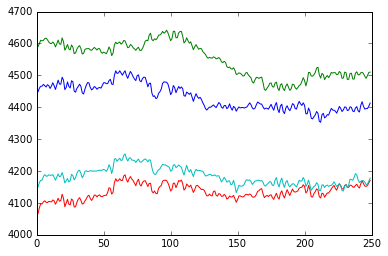

In [18]:
plt.plot(signals[2])

In [19]:
plt.plot(signals[401])

IndexError: index 401 is out of bounds for axis 0 with size 92